In [187]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [43]:
PALM = yf.Ticker("PALM.L")
COBR = yf.Ticker("COBR.L")

yfinance.Ticker object <PALM.L>


In [137]:
yf.Ticker('KAT.L').info

{'zip': 'EC3V OHR',
 'sector': 'Basic Materials',
 'fullTimeEmployees': 5,
 'longBusinessSummary': 'Katoro Gold plc primarily engages in the gold and nickel exploration activities. It has an option agreement to acquire 35% interest in the Haneti nickel project in central Tanzania. The company was incorporated in 2014 and is based in London, the United Kingdom. Katoro Gold plc is a subsidiary of Kibo Energy PLC.',
 'city': 'London',
 'country': 'United Kingdom',
 'companyOfficers': [],
 'website': 'http://www.katorogold.com',
 'maxAge': 1,
 'address1': '60 Gracechurch Street',
 'industry': 'Gold',
 'address2': '6th Floor',
 'previousClose': 1.9,
 'regularMarketOpen': 1.9071,
 'twoHundredDayAverage': 2.226831,
 'trailingAnnualDividendYield': None,
 'payoutRatio': 0,
 'volume24Hr': None,
 'regularMarketDayHigh': 1.867,
 'navPrice': None,
 'averageDailyVolume10Day': 3804505,
 'totalAssets': None,
 'regularMarketPreviousClose': 1.9,
 'fiftyDayAverage': 2.061143,
 'trailingAnnualDividendRate

In [47]:
COBR.info

{'zip': 'EC2V 6DN',
 'sector': 'Basic Materials',
 'longBusinessSummary': 'Cobra Resources plc engages in the exploration and mining of gold and copper. It holds 100% interests in the Wudinna project covering an area of 1,928 square kilometers located in Central Gawler Craton Gold Province, South Australia; and the Prince Alfred Copper project situated approximately 100 km north-east of Port Augusta, South Australia. Cobra Resources plc was incorporated in 2018 and is headquartered in London, the United Kingdom.',
 'city': 'London',
 'phone': '44 20 3778 0881',
 'country': 'United Kingdom',
 'companyOfficers': [],
 'website': 'http://www.cobraplc.com',
 'maxAge': 1,
 'address1': '107 Cheapside',
 'industry': 'Other Industrial Metals & Mining',
 'address2': '9th Floor',
 'previousClose': 2.7,
 'regularMarketOpen': 2.7952,
 'twoHundredDayAverage': 2.6027112,
 'trailingAnnualDividendYield': None,
 'payoutRatio': 0,
 'volume24Hr': None,
 'regularMarketDayHigh': 2.7952,
 'navPrice': None,
 

In [42]:
PALM.info

{'zip': 'IM1 4LB',
 'sector': 'Basic Materials',
 'longBusinessSummary': 'Panther Metals PLC invests in and acquires projects in the natural resources sector. It engages in developing the Bear Lake project, which explores for gold and volcanogenic massive sulphide deposits that consists of 69 claim units covering 42 square kilometers located in Ontario, Canada. It holds interests in the Schreiber-Pyramid property; and the Marrakai Gold project exploration licence application covering an area of 13.4 square kilometers located in the highly-prospective Pine Creek Orogen, Northern Territory, Australia. The company was formerly known as London Nusantara Plantations Plc and changed its name to Panther Metals PLC in April 2018. The company was incorporated in 2013 and is based in Douglas, the United Kingdom.',
 'city': 'Douglas',
 'country': 'Isle of Man',
 'companyOfficers': [],
 'website': 'http://www.panthermetals.co.uk',
 'maxAge': 1,
 'address1': '34 North Quay',
 'industry': 'Gold',
 '

In [32]:
# useful codes

# PALM.info

# type(PALM.info)

# PALM.info.keys()

# PALM.info.items()

# for key,value in PALM.info.items():
#     if value is not None:
#         print(key, ':', value)

# PALM.info.values()

# list(PALM.info.values())[1]

# COBR.info.get('volume')

#### load excel

In [37]:
df = pd.read_excel('/Users/paxton615/Desktop/Copy of SI Placing History.xlsx')

#### sort out columns and index for future use

In [38]:
df.columns = df.iloc[0]

In [40]:
df = df.iloc[1: , :]

In [53]:
df["Ticker_London"] = [i+ '.L' for i in df.Ticker]

<ipython-input-53-1132d5cb2231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ticker_London"] = [i+ '.L' for i in df.Ticker]


In [58]:
new_columns = ['Company Name', 'Ticker', 'Month', 'Year', 'Price raised at',
       'Warrant price', 'Total raise', 'High Post Raise',
       'capital growth rate', 'net profit rate', 'Ticker_London']

In [59]:
new_columns = [i.lower().replace(' ','_') for i in new_columns]

In [63]:
df.columns = new_columns

In [78]:
df.reset_index(drop=True, inplace=True)

#### sort out columns and index for future use, check the results

In [100]:
df.head()

,company_name,ticker,month,year,price_raised_at,warrant_price,total_raise,high_post_raise,capital_growth_rate,net_profit_rate,ticker_london
0,Panther Metals,PALM,Jan,2020,10,-,300000,17.9,1.79,0.79,PALM.L
1,Cobra Resources,COBR,Jan,2020,2.25,3,677145,3.8475,1.71,0.71,COBR.L
2,Katoro Gold,KAT,Feb,2020,1.25,2,215000,3.9,3.12,2.12,KAT.L
3,Incanthera,INC,Feb,2020,9.5,NaN,322000,20,2.10526,1.10526,INC.L
4,AMTE Power Pre-IPO,AMTE,Apr,2020,73.35,NaN,1753000,332,4.52624,3.52624,AMTE.L


#### because INC.L has problem pulling data, try and  except must be used

In [97]:
previous_close = []
for i in df.ticker_london:
    try:
        previous_close.append(yf.Ticker(i).info.get('previousClose'))
    except:
        previous_close.append(0)

In [99]:
previous_close = [np.round(i,3) for i in previous_close]
print(previous_close)

[12.25, 2.7, 1.95, 0, 272.5, 22, 2.625, 3.2, 22, 0.775, 1.95, 12.25, 2.625, 2.55, 2.7, 0, 0.85, 41, 3.2, 12.25, 1.95, 41, 22, 25, 272.5, 0.775]


In [130]:
df['latest_close'] = previous_close

<ipython-input-130-0d91e51ffe79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latest_close'] = previous_close


In [132]:
df['latest_growth_rate'] = df.latest_close/df.price_raised_at

<ipython-input-132-f4036a6509e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latest_growth_rate'] = df.latest_close/df.price_raised_at


#### add industry info to df

In [139]:
industry = []
for i in df.ticker_london:
    try:
        industry.append(yf.Ticker(i).info.get('industry'))
    except:
        industry.append('NaN')
df['industry'] = industry

<ipython-input-139-db591e1824e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry'] = industry


In [141]:
avg_vol_10days = []
for i in df.ticker_london:
    try:
        avg_vol_10days.append(yf.Ticker(i).info.get('averageDailyVolume10Day'))
    except:
        avg_vol_10days.append(0)
df['avg_vol_10days'] = avg_vol_10days

<ipython-input-141-1ed4ff911770>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_vol_10days'] = avg_vol_10days


In [144]:
df['company_names'] = df['company_name']

<ipython-input-144-852d581dbaee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_names'] = df['company_name']


In [145]:
df

,company_name,ticker,month,year,price_raised_at,warrant_price,total_raise,high_post_raise,capital_growth_rate,net_profit_rate,ticker_london,previous_close,latest_close,latest_growth_rate,industry,avg_vol_10days,company_names
0,Panther Metals,PALM,Jan,2020,10,-,300000,17.9,1.79,0.79,PALM.L,12.250,12.250,1.225,Gold,211883,Panther Metals
1,Cobra Resources,COBR,Jan,2020,2.25,3,677145,3.8475,1.71,0.71,COBR.L,2.700,2.700,1.2,Other Industrial Metals & Mining,1899228,Cobra Resources
2,Katoro Gold,KAT,Feb,2020,1.25,2,215000,3.9,3.12,2.12,KAT.L,1.950,1.950,1.56,Gold,3804505,Katoro Gold
3,Incanthera,INC,Feb,2020,9.5,NaN,322000,20,2.10526,1.10526,INC.L,0.000,0.000,0,NaN,0,Incanthera
4,AMTE Power Pre-IPO,AMTE,Apr,2020,73.35,NaN,1753000,332,4.52624,3.52624,AMTE.L,272.500,272.500,3.71506,Electrical Equipment & Parts,668683,AMTE Power Pre-IPO
5,Kanabo CLN,KNB,Apr,2020,0.05,0.1,250000,0.51,10.2,9.2,KNB.L,22.000,22.000,440,Pharmaceutical Retailers,2166674,Kanabo CLN
6,ECR Minerals,ECR,Apr,2020,0.5,1,500000,4.4,8.8,7.8,ECR.L,2.625,2.625,5.25,Gold,7036822,ECR Minerals
7,Kavango Resources,KAV,Apr,2020,0.8,NaN,218000,3.977,4.97125,3.97125,KAV.L,3.200,3.200,4,Other Industrial Metals & Mining,1743897,Kavango Resources
8,Ironridge Reosurces,IRR,May,2020,7,12,4750000,28,4,3,IRR.L,22.000,22.000,3.14286,Other Industrial Metals & Mining,913577,Ironridge Reosurces
9,MNRG CLN,MNRG,Jul,2020,0.6,NaN,330000,1.4475,2.4125,1.4125,MNRG.L,0.775,0.775,1.29167,Other Industrial Metals & Mining,36106155,MNRG CLN


In [199]:
df.to_csv(r'/Users/paxton615/Github_Personal/Notes/Notes/Financial_models/df_0325.csv')

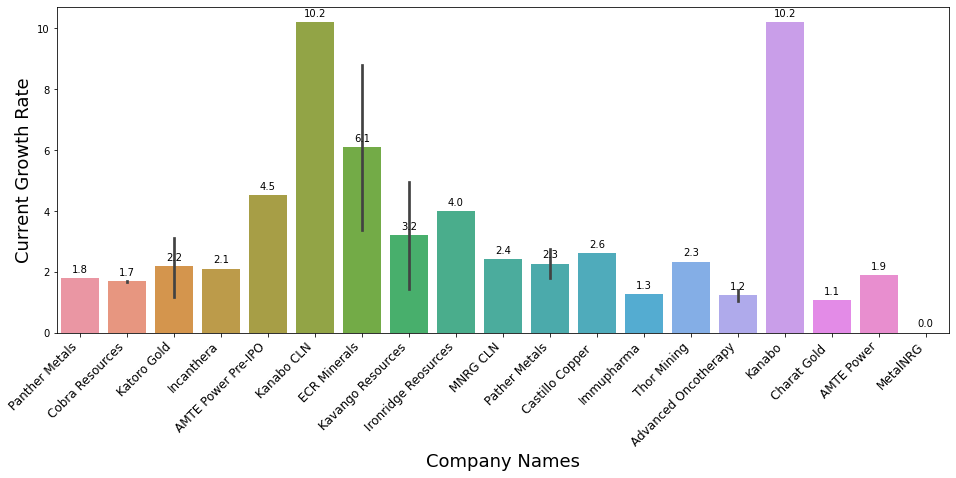

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
splot=sns.barplot(x="company_name",y="capital_growth_rate",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set_xticklabels(splot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.xlabel('Company Names', fontsize=18)
plt.ylabel('Current Growth Rate', fontsize=18)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")

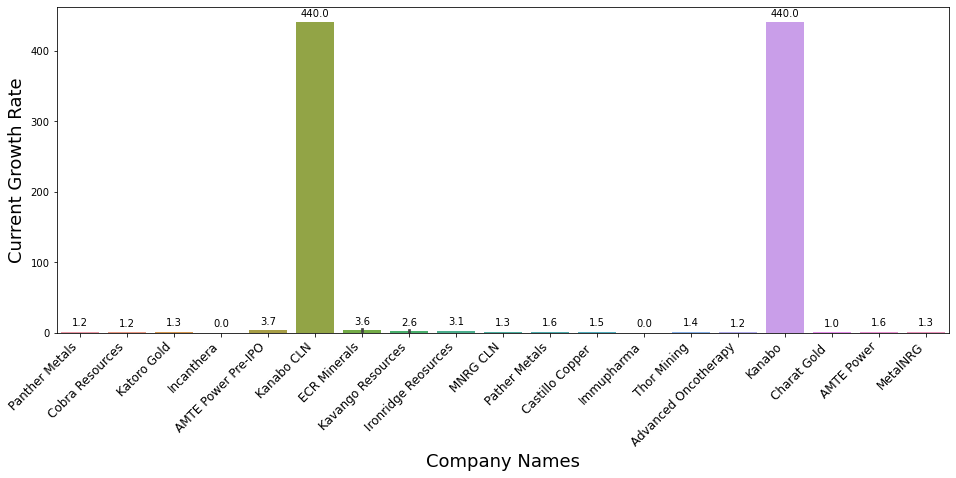

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
splot=sns.barplot(x="company_name",y="latest_growth_rate",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set_xticklabels(splot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.xlabel('Company Names', fontsize=18)
plt.ylabel('Current Growth Rate', fontsize=18)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")

In [135]:
df_avg = df[df['latest_growth_rate']<10]

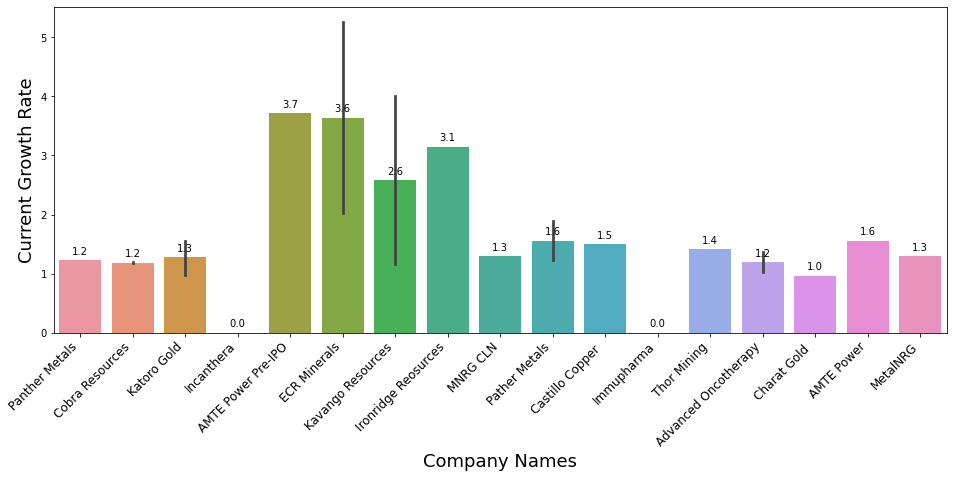

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
splot=sns.barplot(x="company_name",y="latest_growth_rate",data=df_avg)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set_xticklabels(splot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.xlabel('Company Names', fontsize=18)
plt.ylabel('Current Growth Rate', fontsize=18)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")

In [215]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from IPython.display import IFrame
import IPython
c = (
    Bar()
    .add_xaxis(list(df['company_name']))
    .add_yaxis("Input", list(df['price_raised_at']), stack="stack1")
    .add_yaxis("Outcome", list(df['latest_close']), stack="stack1" ,color="#5793f3")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="In-out graph"))
    .render("bar_stack9.html")
)
# IFrame(src='file:///Users/paxton615/Github_Personal/Notes/Notes/Financial_models/bar_stack.html', width=1800, height=1600)
# Image(filename='/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/pics/funnel_chart.png')

In [166]:
! pwd

/Users/paxton615/Github_Personal/Notes/Notes/Financial_models


In [252]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_l = minmax.fit_transform(df[['latest_close', 'price_raised_at']])

In [253]:
x_l

array([[0.04495413, 0.05687339],
       [0.00990826, 0.01257502],
       [0.00715596, 0.0068591 ],
       [0.        , 0.05401543],
       [1.        , 0.41897685],
       [0.08073394, 0.        ],
       [0.00963303, 0.00257216],
       [0.01174312, 0.00428694],
       [0.08073394, 0.03972564],
       [0.00284404, 0.00314376],
       [0.00715596, 0.00828808],
       [0.04495413, 0.03686768],
       [0.00963303, 0.0071449 ],
       [0.0093578 , 0.00943127],
       [0.00990826, 0.01286082],
       [0.        , 0.06258931],
       [0.00311927, 0.00314376],
       [0.15045872, 0.17119177],
       [0.01174312, 0.01543298],
       [0.04495413, 0.05687339],
       [0.00715596, 0.01114604],
       [0.15045872, 0.22835096],
       [0.08073394, 0.        ],
       [0.09174312, 0.14832809],
       [1.        , 1.        ],
       [0.00284404, 0.00314376]])